# Homework 1 submission
for course: Data Science lab 2   
by  Michael Berger   
 

Lecturer: Dr. Sharon Yalov-Handzel
Afeka College of engineering


## 1. Choose a Python environment 
and install it on your computer (PyCharm or Google Colab).

## 2. Install the following libraries: 
numpy, matplotlib, pandas, tensorflow, sklearn, and pytorch.

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import tensorflow as tf
#import pytorch as pt

import os
from datetime import datetime
import statistics as stat

import plotly.express as px
from plotly.subplots import make_subplots

%matplotlib inline

2024-06-11 14:24:16.291279: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-11 14:24:17.019237: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-11 14:24:17.818495: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 3. Write a program that loads the MNIST dataset

In [2]:
# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

TensorFlow version: 2.16.1


In [3]:
print ("x_train.shape", x_train.shape, 
       "\n", "x_test.shape", x_test.shape)

x_train.shape (60000, 28, 28) 
 x_test.shape (10000, 28, 28)


In [4]:
#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

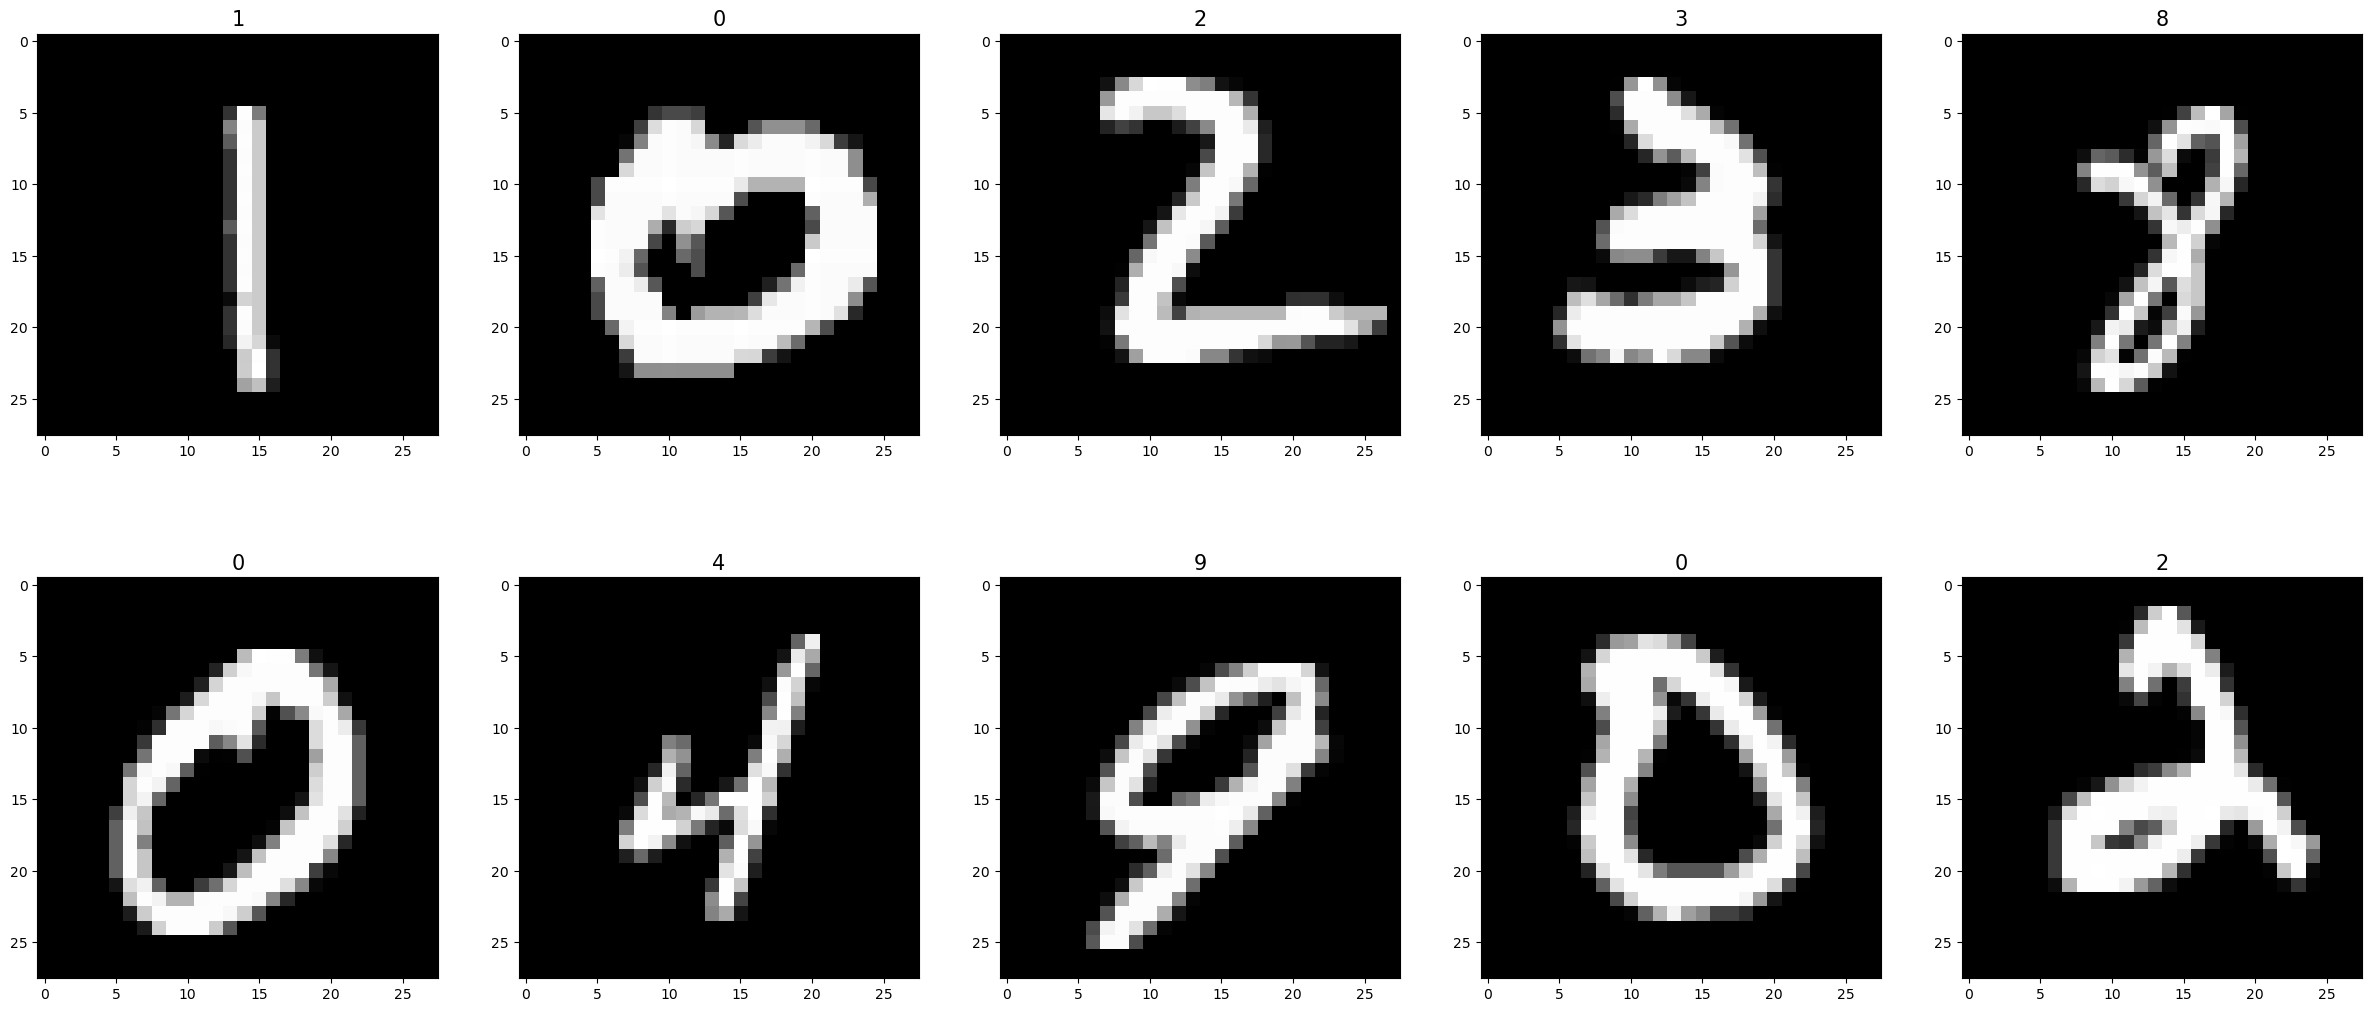

In [5]:
# 10 train examples
imgIds = stat.random.sample(range(len(y_train)), 10)
show_images(x_train[imgIds], y_train[imgIds] )

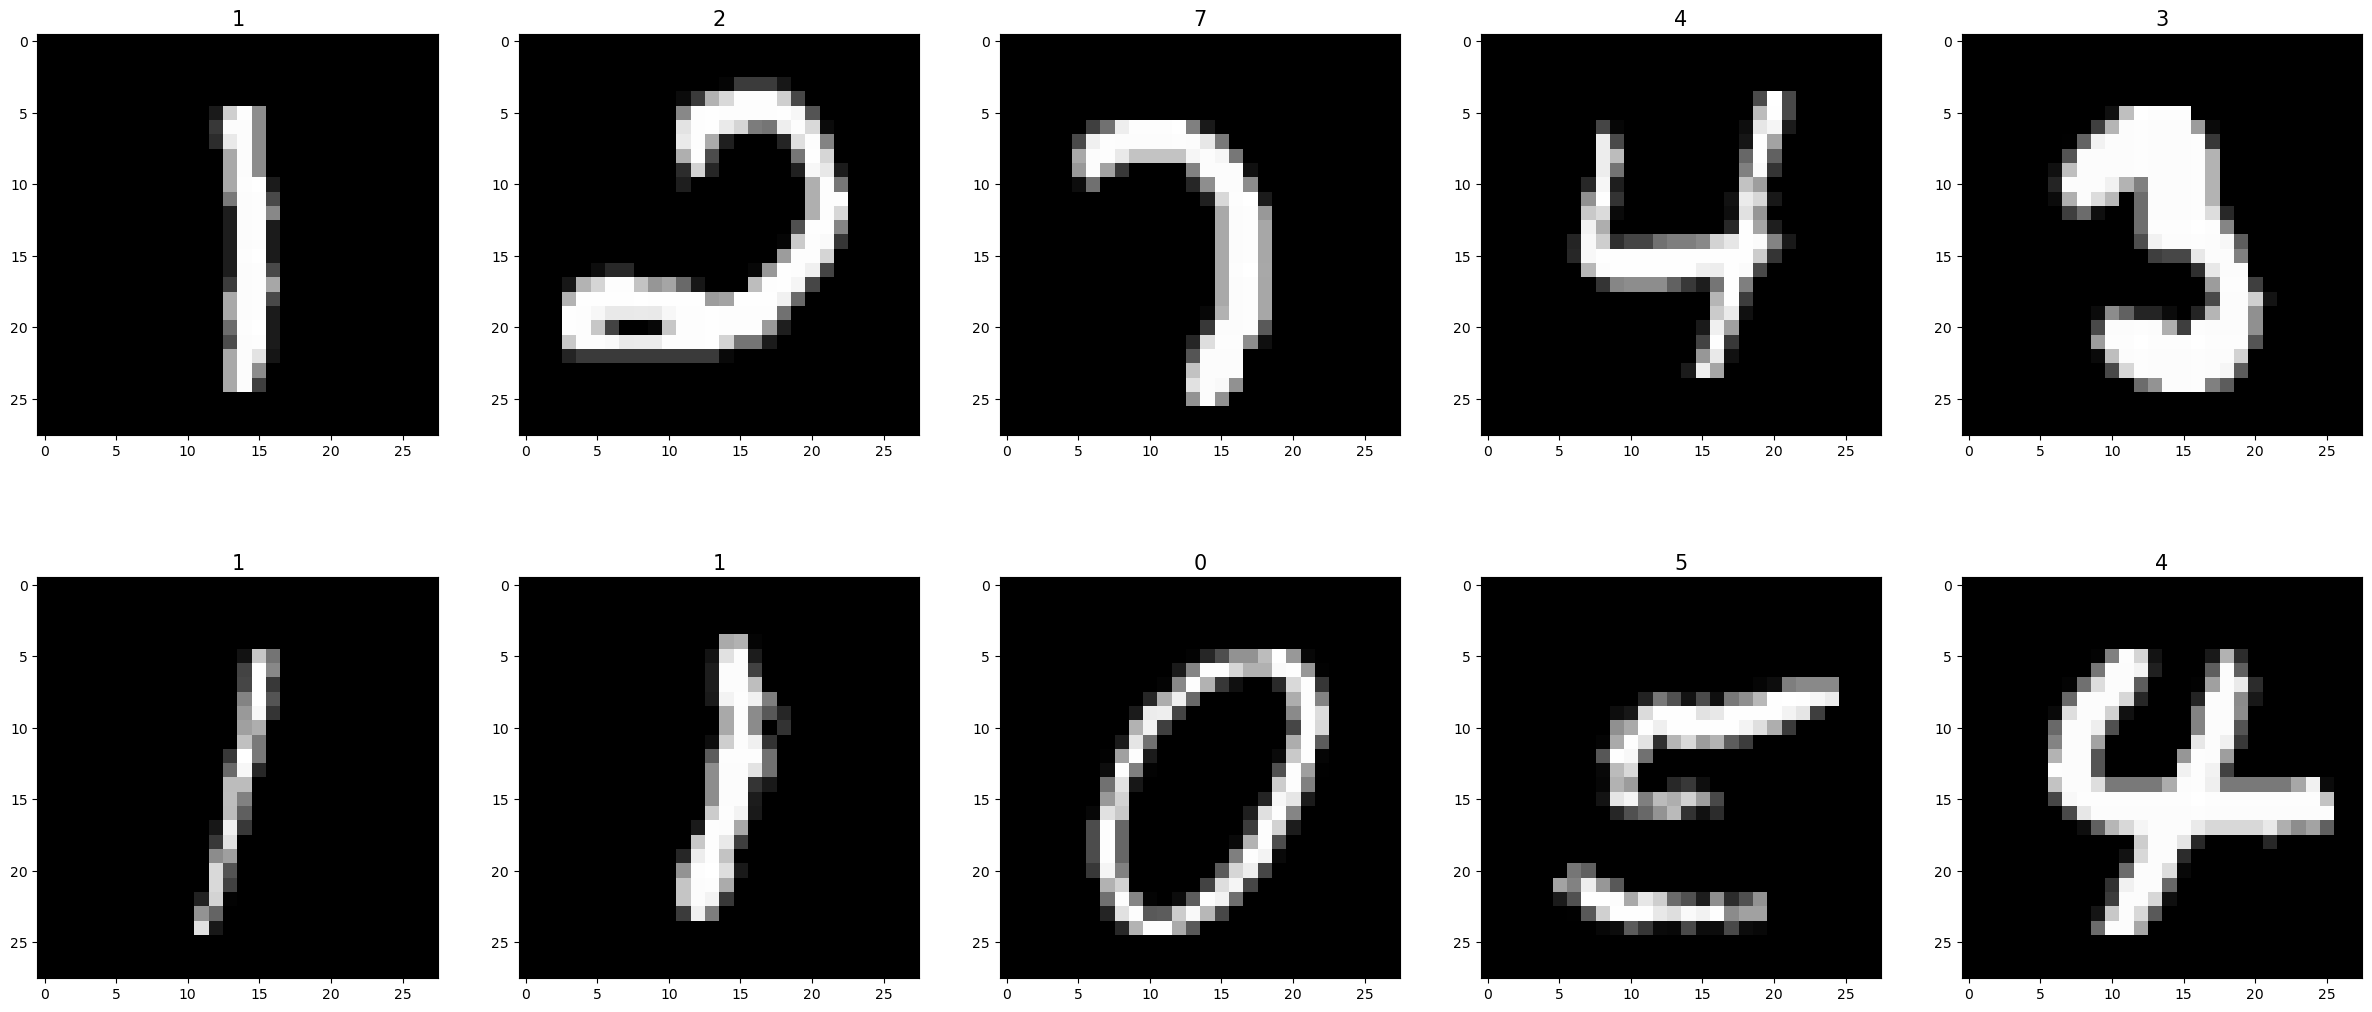

In [6]:
# 10 test examples
imgIds = stat.random.sample(range(len(y_test)), 10)
show_images(x_test[imgIds], y_test[imgIds] )

## 4. Present simple statistics of this dataset 
number of images, their distribution, 

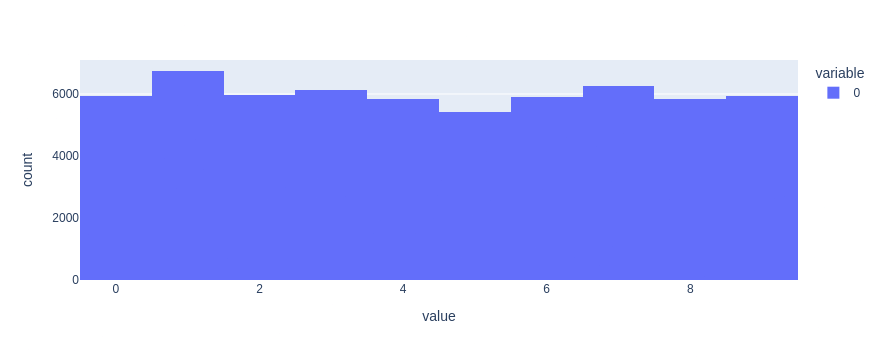

In [9]:
px.histogram( y_train, barmode='group')

In [55]:
hst = np.histogram(y_train,);

In [900]:
np.mean( hst[0]), np.std( hst[0])

(6000.0, 322.082908581005)

In [57]:
img = x_train[3459]

In [58]:
y_train[3459]

4

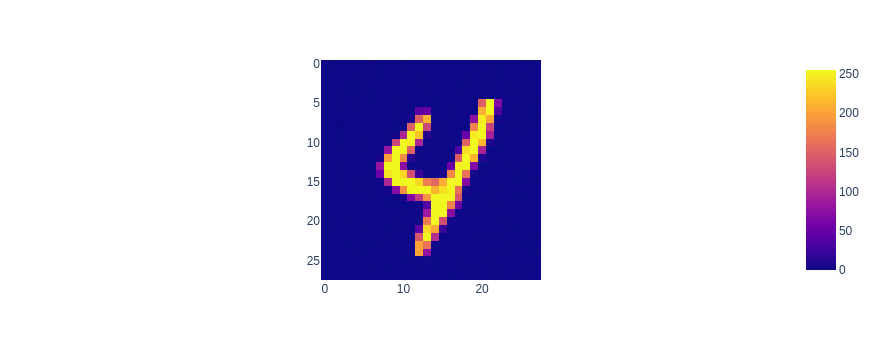

In [59]:
px.imshow(img)

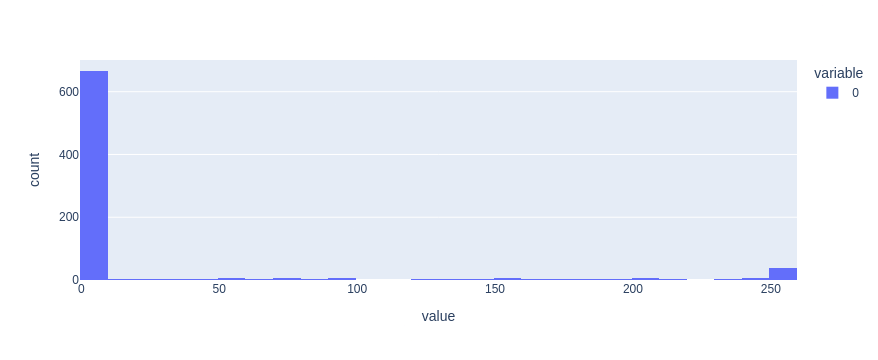

In [63]:
px.histogram(img.flatten())

### a. average number of white pixels in each class and its standard deviation, 

In [64]:
nonzeros_train = [np.count_nonzero(img) for img in x_train]

In [65]:
nonzeros_train[0:10]

[166, 176, 120, 96, 142, 188, 93, 200, 68, 130]

In [66]:
nonzeros_test = [np.count_nonzero(img) for img in x_test]

In [67]:
np.mean(nonzeros_train), np.std(nonzeros_train)

(149.9026, 41.45702610221819)

In [68]:
np.mean(nonzeros_train)/np.prod(x_train[0].shape)*100

19.120229591836736

In [69]:
np.mean(nonzeros_test), np.std(nonzeros_test)

(151.1219, 41.4674141994651)

In [70]:
np.prod(img.shape)

784

In [71]:
np.mean(nonzeros_test)/np.prod(x_test[0].shape)*100

19.27575255102041

### b. the number of common pixels in each class that are non-white.

First, let's split the datasets to their respective classes 

In [341]:
x_train_byclass = [x_train[y_train == l] for l in np.unique(y_train)]

In [73]:
len(x_train_byclass)

10

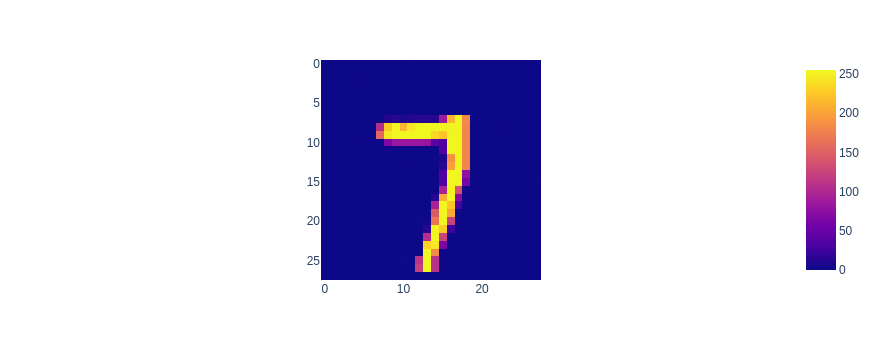

In [74]:
px.imshow(x_train_byclass[7][4000])

In [75]:
x_test_byclass = [x_test[y_test == l] for l in np.unique(y_test)]

Now, the x_..._byclass are lists containing   
axis 0 = classes of characters, 0,1, ... 9  
axis 1 = # of sample image  
axis 2 = rows  
axis 3 = cell of a row  

Let's take 67th sample of "0" class.  

Also, as we are only interested in non-white pixels, 
we can convert them into ones for convenient multiplications down the line.

In [76]:
zero = x_train_byclass[0][67]

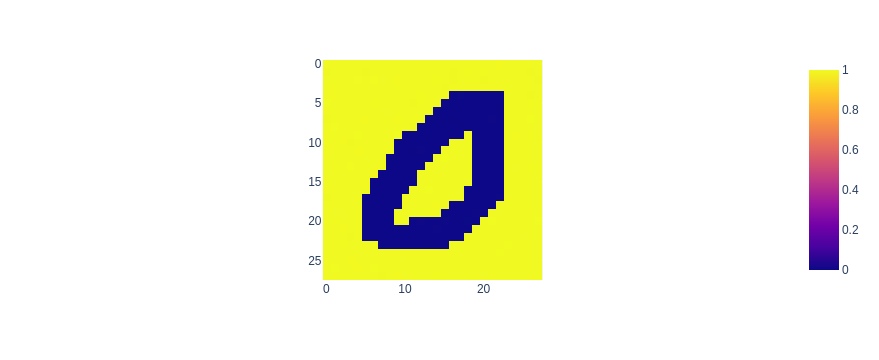

In [77]:
px.imshow(1-(zero>0).astype(int))

Now,for each class we can:  
 apply pixel-wise multiplication over all the samples of a class

After that we acquire an aggreagated image of a class, 
which essentially shows the pixels that are always black, in every instance of the character.  
Unsurprisingly, these are on the borders.

In [78]:
nonwhites = [1-np.multiply.reduce(1-(clas>0).astype(int), axis=0) for clas in x_test_byclass]

In [79]:
nonwhites[0].shape

(28, 28)

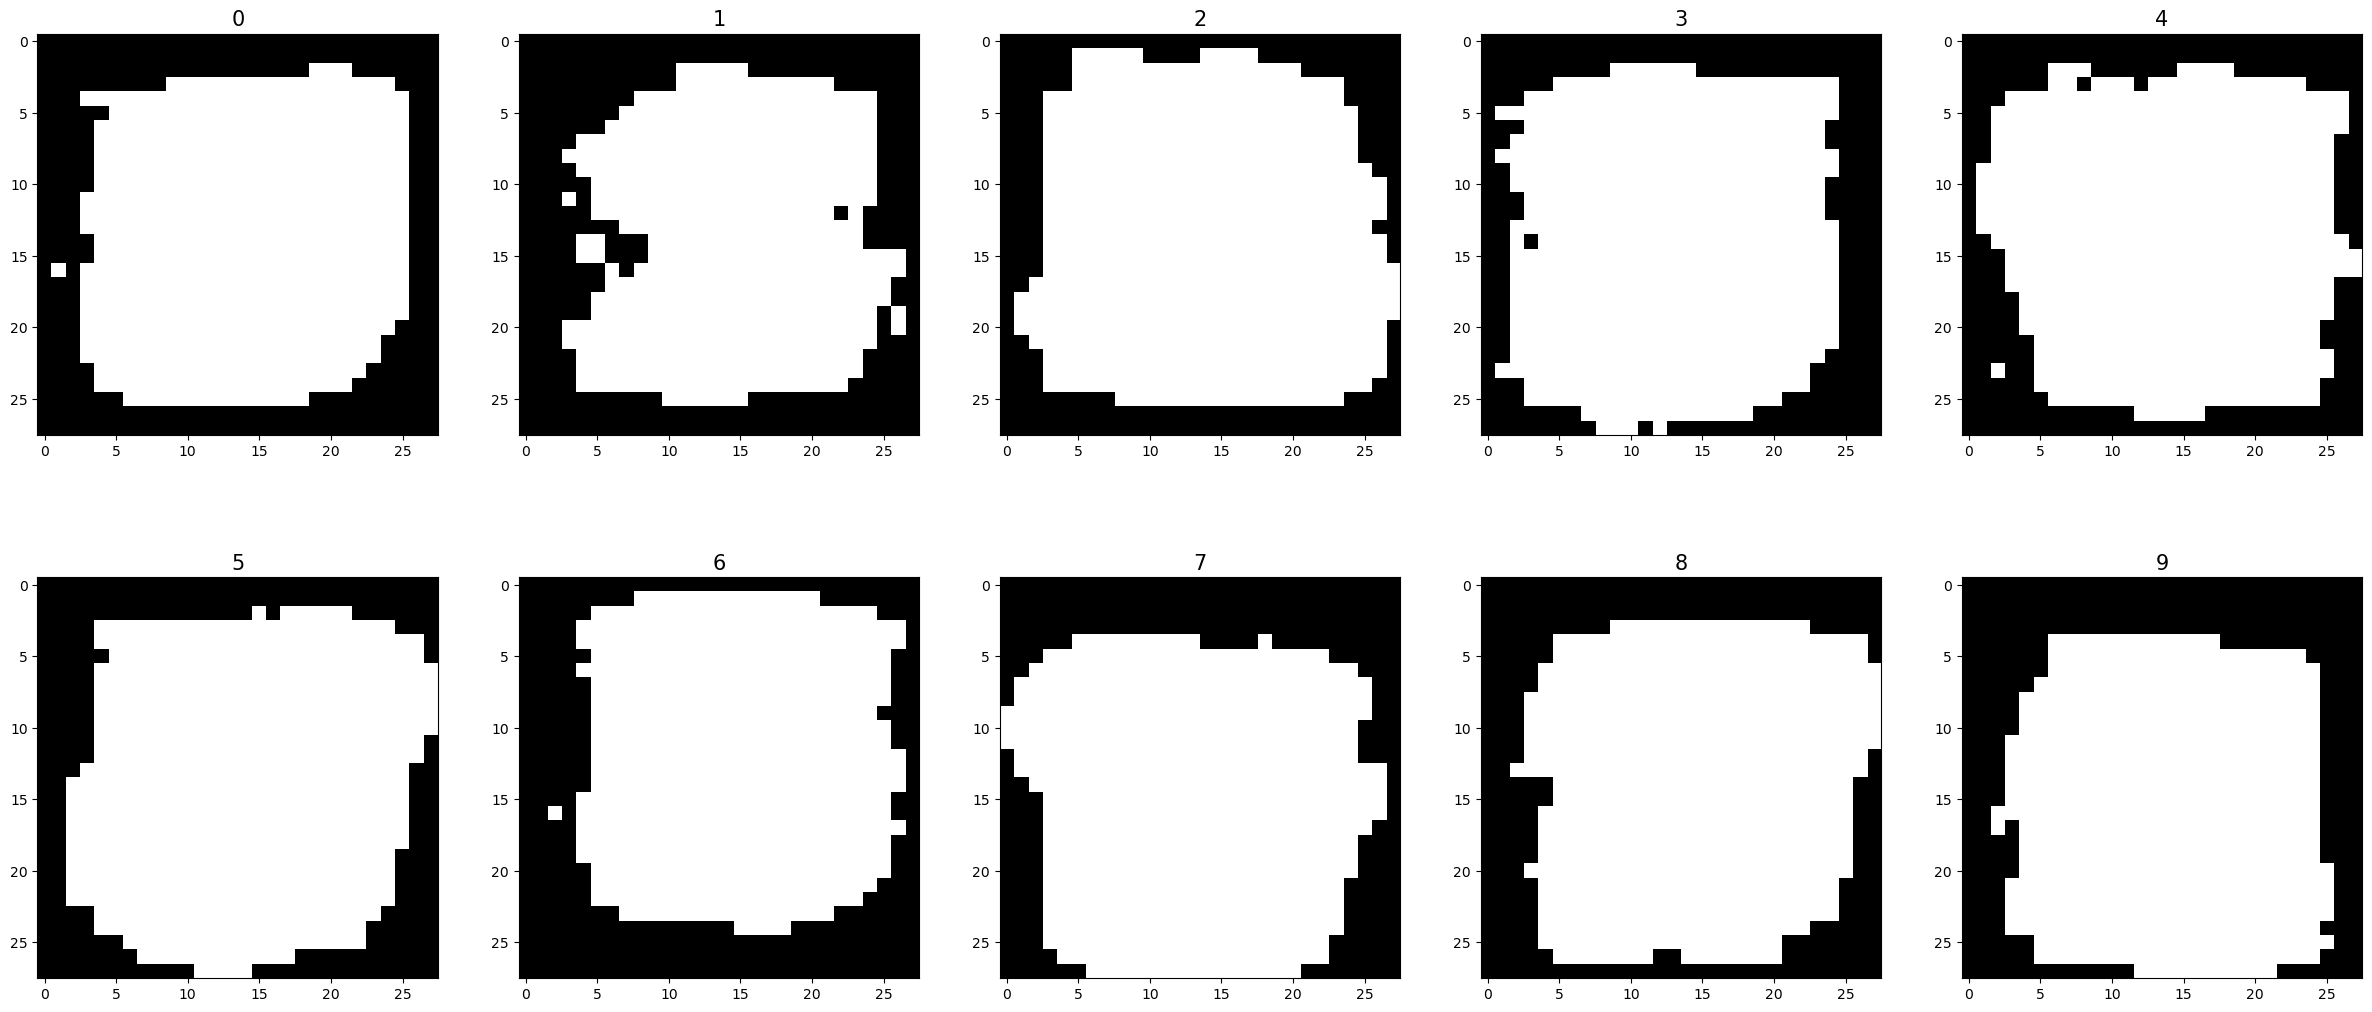

In [80]:
show_images(nonwhites, list(range(0,10)))

Another Interesting way to view an aggregation over classes is to look at "averaged" character:

In [81]:
averaged = [np.add.reduce(clas, axis=0) for clas in x_train_byclass]

In [82]:
averaged = [(clas * (255.0/clas.max())).astype(int) for clas in averaged]

In [83]:
averaged[0].shape

(28, 28)

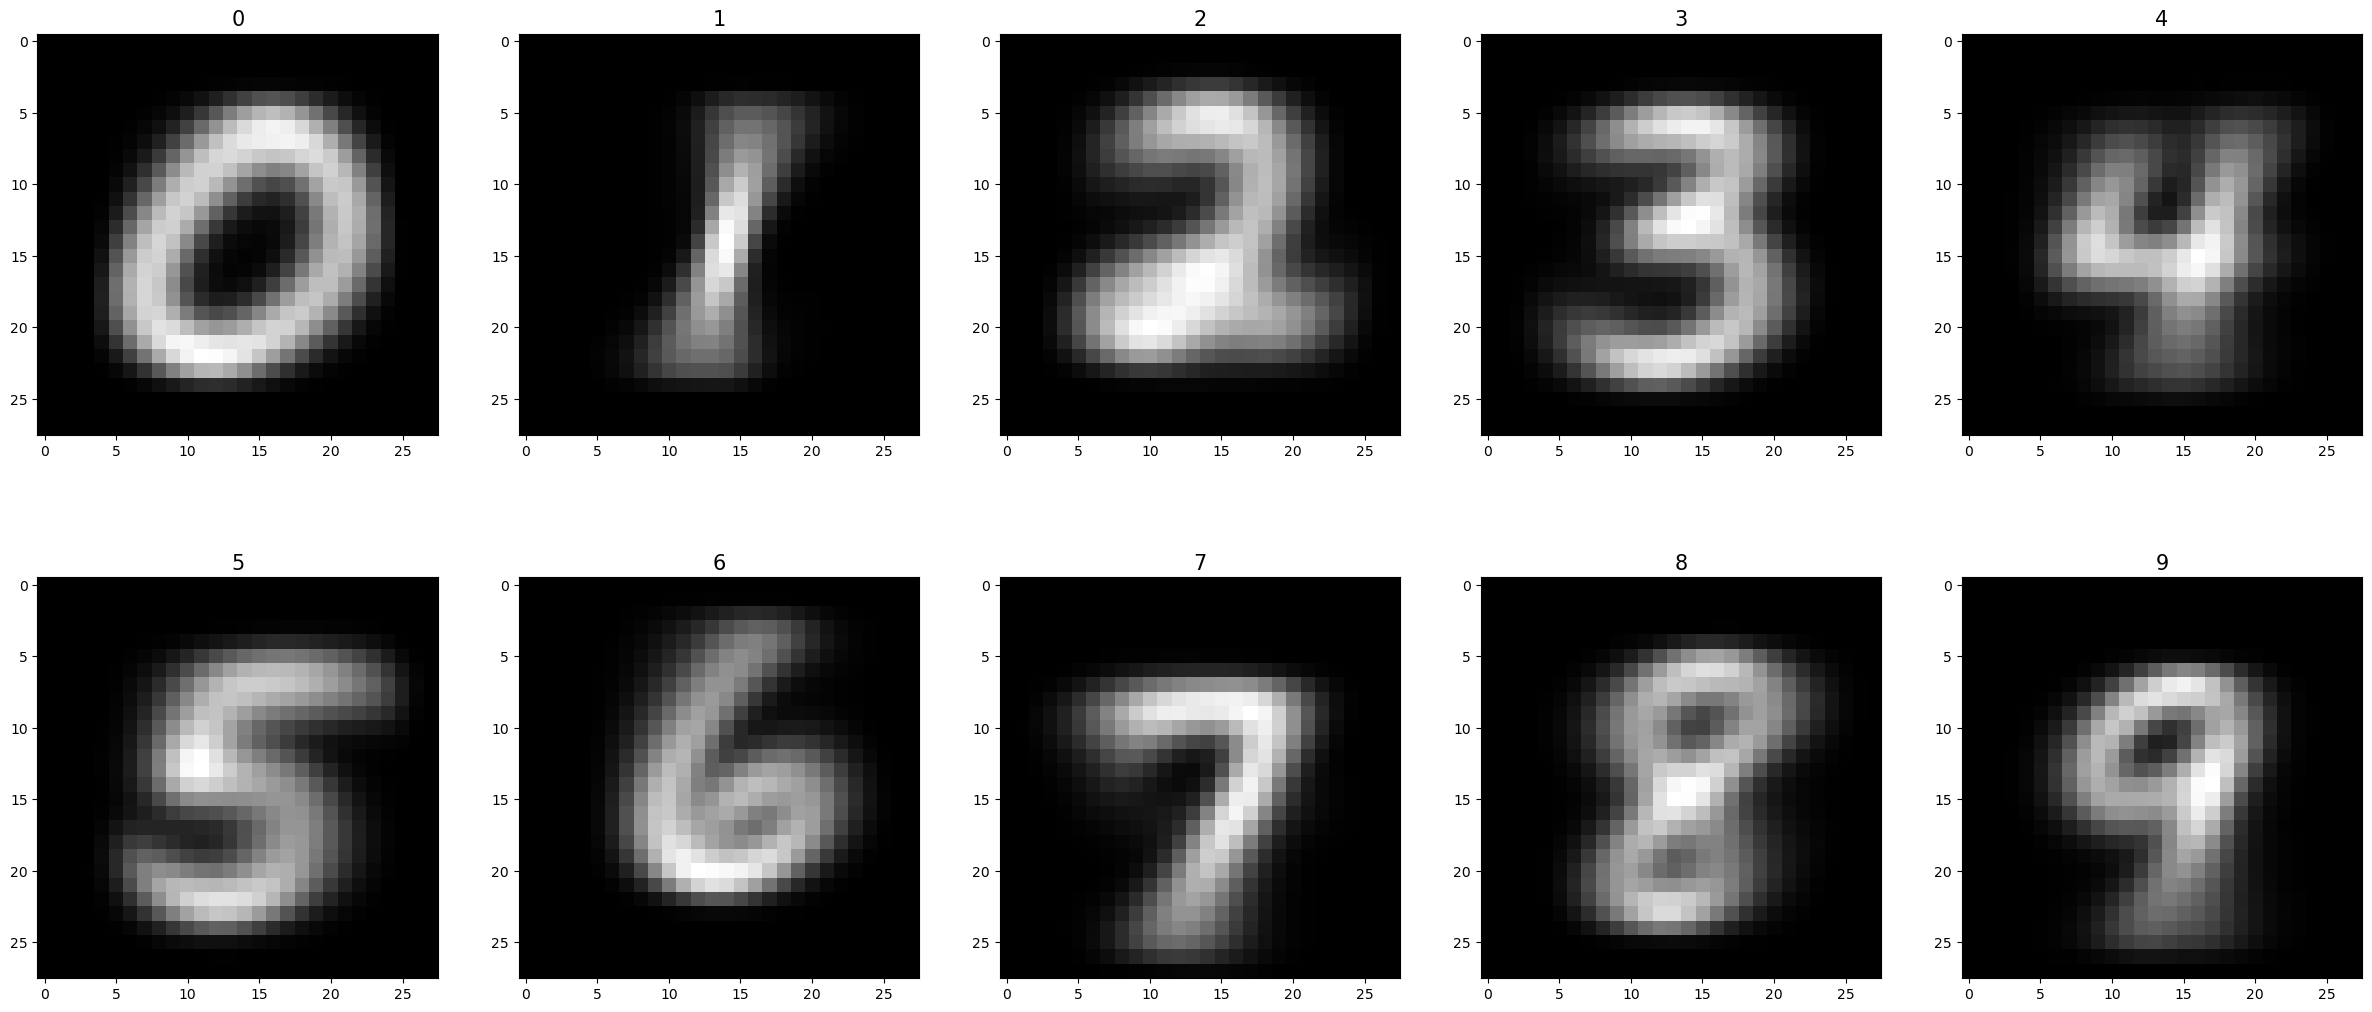

In [84]:
show_images(averaged, list(range(0,10)))

## 5. Apply a simple neural network to this dataset, in order to perform classification. 
(You can use the `tensorflowlib.py` program from Moodle). 
Describe the results of different measures: 
    accuracy, precision, recall, F1, sensitivity, and specificity

In [795]:
# uncomment if you want to drop all the previous results
# and start measuring performance from start
fit_runs = pd.DataFrame(columns=['epoch','data'])
fit_runs

Empty DataFrame
Columns: [epoch, data]
Index: []

In [796]:
epochs = 20

In [848]:
def apply_nn(x_train, y_train, x_test, y_test, epochs=5):
    # Construct the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=x_train.shape[-2:]),
        # Flatten the 28x28 images to a 1D array
        tf.keras.layers.Flatten(),
        # Fully connected layer with 128 units and ReLU activation
        tf.keras.layers.Dense(128, activation='relu'),
        # Dropout layer to prevent overfitting
        tf.keras.layers.Dropout(0.2),
        # Output layer with 10 units (one for each digit class)
        tf.keras.layers.Dense(10)
    ])
    
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    # Train the model
    print(f"training model with {epochs} epochs, please wait...")
    log = model.fit(x_train, y_train, epochs=epochs, validation_split= .1, verbose=0)

    # Evaluate the model on test set
    loss, acc = model.evaluate(x_test, y_test)
    log.history["tst_loss"]=loss
    log.history["tst_accuracy"] = acc
    
    return model, log
  

In [823]:
model, log = apply_nn(x_train, y_train, x_test, y_test, epochs=4)

training model, please wait...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9714 - loss: 0.0889


In [800]:
metrics = 'accuracy, precision, recall, f1_score'.split(", ") #, sensitivity, specificity
metrics

['accuracy', 'precision', 'recall', 'f1_score']

In [801]:
# Normalize pixel values to a range of 0 to 1
if x_train.max()>1:
    x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.max()

1.0

In [802]:
#model.summary()

## 6. Describe the confusion matrix of the above classification. 
What conclusions can be drawn from this matrix?

The confusion matrix reveals how well the model performs across different classes.
Diagonal values indicate correct classifications, while off-diagonal values represent misclassifications.
The classification report provides detailed performance metrics (precision, recall, F1-score) for each class.
High precision and recall values for a class indicate strong model performance for that class, while lower values suggest the need for further improvement.

In [803]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def confuse(model, x_test, y_test):
    # Predict the labels of the test set
    y_pred = np.argmax(model.predict(x_test), axis=1)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    
    # Print classification report
    report = classification_report(y_test, y_pred)
    return report



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step


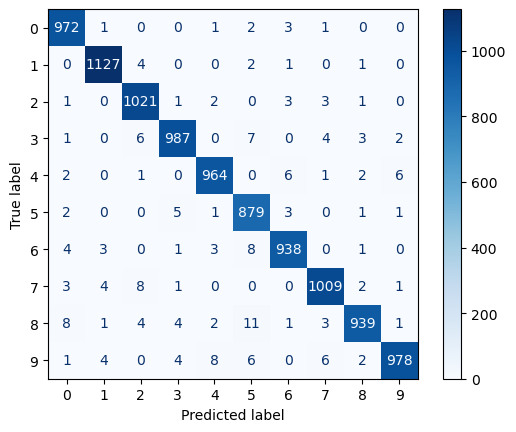

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.99      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [804]:
rep = confuse(model,x_test, y_test);
print(rep)

## 7. Show a figure of the Loss along the training. 
What is the optimal number of epochs?

In [846]:
#fit_runs = pd.DataFrame(columns=['epoch','data'])


def report(fit_log, data_label):
    a = fit_log.history
    a["epoch"] = fit_log.epoch
    a["data"] = data_label
    log_df = pd.DataFrame(a)    
    global fit_runs # I know it's bad practice

    if( data_label in fit_runs.data.unique()):
        import warnings
        warnings.warn(f"data label '{data_label}' already exists. not adding.")
        
    fit_runs = pd.concat([fit_runs, log_df])

    metrics = list(fit_log.history.keys())
    metrics.sort()
    
    log_df_melted = fit_runs.melt(id_vars=['epoch','data'], 
                            value_vars= metrics, #['accuracy', 'loss'], 
                            var_name='metric', 
                            value_name='value')
    
    rx = r"(?P<set>[valts]+_)?(?P<metric>[A-Za-z]+)"
    nspl = log_df_melted.metric.str.extract(rx)
    log_df_melted.drop('metric',axis=1, inplace=True)
    log_df_melted = log_df_melted.join(nspl)    
    log_df_melted.loc[log_df_melted.set.isna(),"set"] = "trn"
    log_df_melted.loc[log_df_melted.set == "val_", "set"] = "val"
    log_df_melted.loc[log_df_melted.set == "tst_", "set"] = "tst"

    fig = px.line(log_df_melted, x='epoch', y='value', 
                  color='set', facet_row='metric', 
                  facet_col="data")
    return fig, log_df_melted


def drop_label(data_label):
    # careful! 
    # use this  in case you made a mistake 
    # and submitted wrong data into report 
    # usage: drop_label("DimRed_pca")
    global fit_runs
    i = fit_runs[fit_runs.data == data_label].index
    fit_runs.drop(i, inplace=True)
    return fit_runs


In [806]:
fig, melted = report(log, 'original')
#report(log, 'proc')

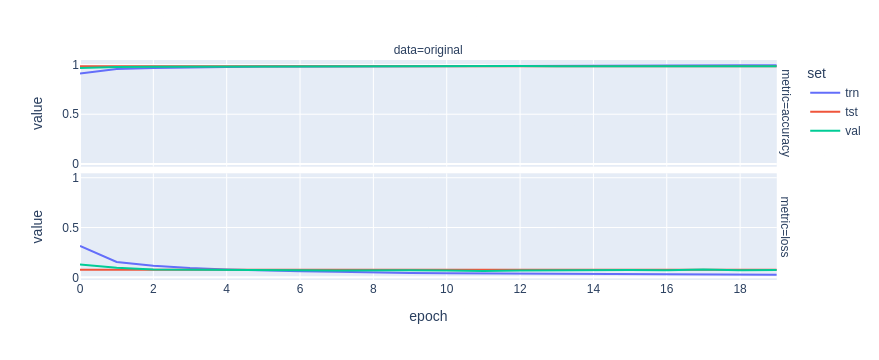

In [807]:
fig

## 8. Construct a new dataset by Bluring
### a. By generating a new image for each image in the original dataset, where the value of each pixel is replaced by the average of all the surrounding pixels. 

In [271]:
def compare_images(images):
    # simple helper function to show 2 images side by side
    fig = make_subplots(rows=1, cols=2)
    for n, image in enumerate(images):
      fig.add_trace(px.imshow(image).data[0], col=n+1, row = 1)# , row=int(n/5)+11)
    return fig

In [272]:
def average_3x3_blocks(img, bs = 3):
    # blurs image by applying 3x3 averaging window
    # on each pixel
    npad = ((1, 1), (1, 1))
    new_img = np.pad(img, pad_width=npad, mode='constant', constant_values=0)   
    for i in range(1, new_img.shape[0]-1):
        for j in range(1, new_img.shape[1]-1):
            block = img[i-1:i+1, j-1:j+1]
            avg_value = np.mean(block)
            new_img[i, j] = avg_value
    return new_img[1:-1,1:-1]
    

In [273]:
def conv2d(a, f):
    # 2d convolution 
    s = f.shape + tuple(np.subtract(a.shape, f.shape) + 1)
    strd = np.lib.stride_tricks.as_strided
    subM = strd(a, shape = s, strides = a.strides * 2)
    return np.einsum('ij,ijkl->kl', f, subM)

In [274]:
mask = np.ones([3,3])/8
mask[1,1] = 0
mask

array([[0.125, 0.125, 0.125],
       [0.125, 0.   , 0.125],
       [0.125, 0.125, 0.125]])

In [275]:
img_convd = conv2d(img,mask)

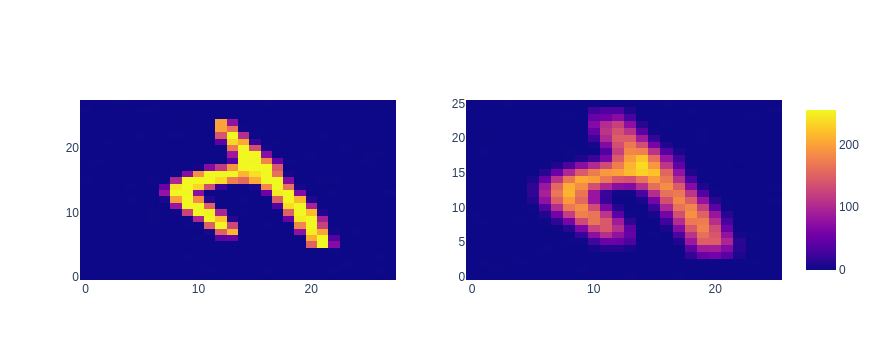

In [276]:
compare_images([img, img_convd])

In [277]:
x_train_blur = np.array([average_3x3_blocks(img) for img in x_train])
x_test_blur = np.array([average_3x3_blocks(img) for img in x_test])

# Normalize pixel values to a range of 0 to 1
x_train_blur,x_test_blur = x_train_blur / 255.0, x_test_blur / 255.0

In [278]:
imgId = 45345
compare_images([x_train[imgId], x_train_blur[imgId]])

In [279]:
img = x_train[37853]

In [280]:
img_new = average_3x3_blocks(img)

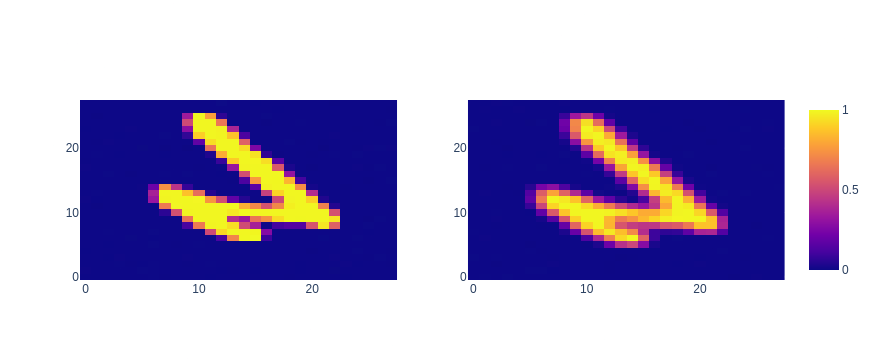

In [281]:
compare_images([img, img_new])

### b. Repeat steps 5-7 for this dataset.

In [808]:
# Train the model
model_blur, log = apply_nn(x_train_blur, y_train, x_test_blur,y_test, epochs=epochs)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5603 - loss: 1.7680 - val_accuracy: 0.8635 - val_loss: 0.6302
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8234 - loss: 0.6518 - val_accuracy: 0.9018 - val_loss: 0.4004
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8635 - loss: 0.4782 - val_accuracy: 0.9155 - val_loss: 0.3276
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8824 - loss: 0.4142 - val_accuracy: 0.9202 - val_loss: 0.2909
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8904 - loss: 0.3783 - val_accuracy: 0.9263 - val_loss: 0.2660
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8960 - loss: 0.3501 - val_accuracy: 0.9293 - val_loss: 0.2520
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9035 - loss: 0.3324 - val_accuracy: 0.9332 - val_loss: 0.2381
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.9085 - loss: 0.3190 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step


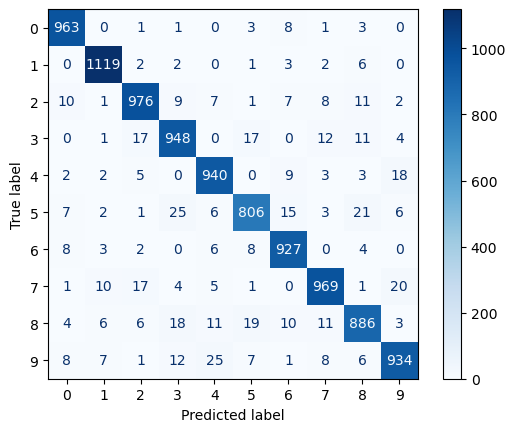

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.94      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.93      0.90      0.92       892
           6       0.95      0.97      0.96       958
           7       0.95      0.94      0.95      1028
           8       0.93      0.91      0.92       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [811]:
rep = confuse(model_blur,x_test_blur, y_test)
print(rep)

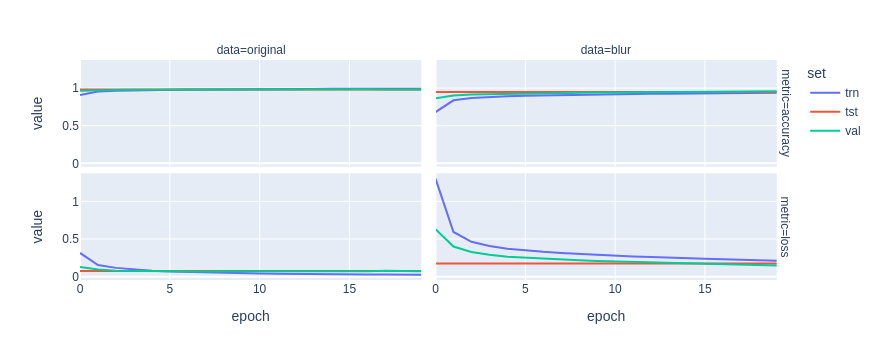

In [812]:
fig, melted = report(log, 'blur')
fig

## 9. Discuss the comparison 
Between the results of the classification applied to the original dataset and the modified dataset.

Comparing the test accuracy of the model trained on the original dataset with the accuracy on the modified dataset reveals how preprocessing affects performance.
If the accuracy significantly drops, it indicates the modification may have removed important features from the images.

## 10. Generate two new datasets with reduced dimensions:

### a. PCA (Principal Component Analysis).

In [286]:
from sklearn.decomposition import PCA

# Flatten the images for PCA
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

# Apply PCA
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Reshape back to 2D
x_train_pca = x_train_pca.reshape(-1, 10, 10)
x_test_pca = x_test_pca.reshape(-1, 10, 10)

In [287]:
x_train_pca.shape

(60000, 10, 10)

In [288]:
x_train_flat.shape

(60000, 784)

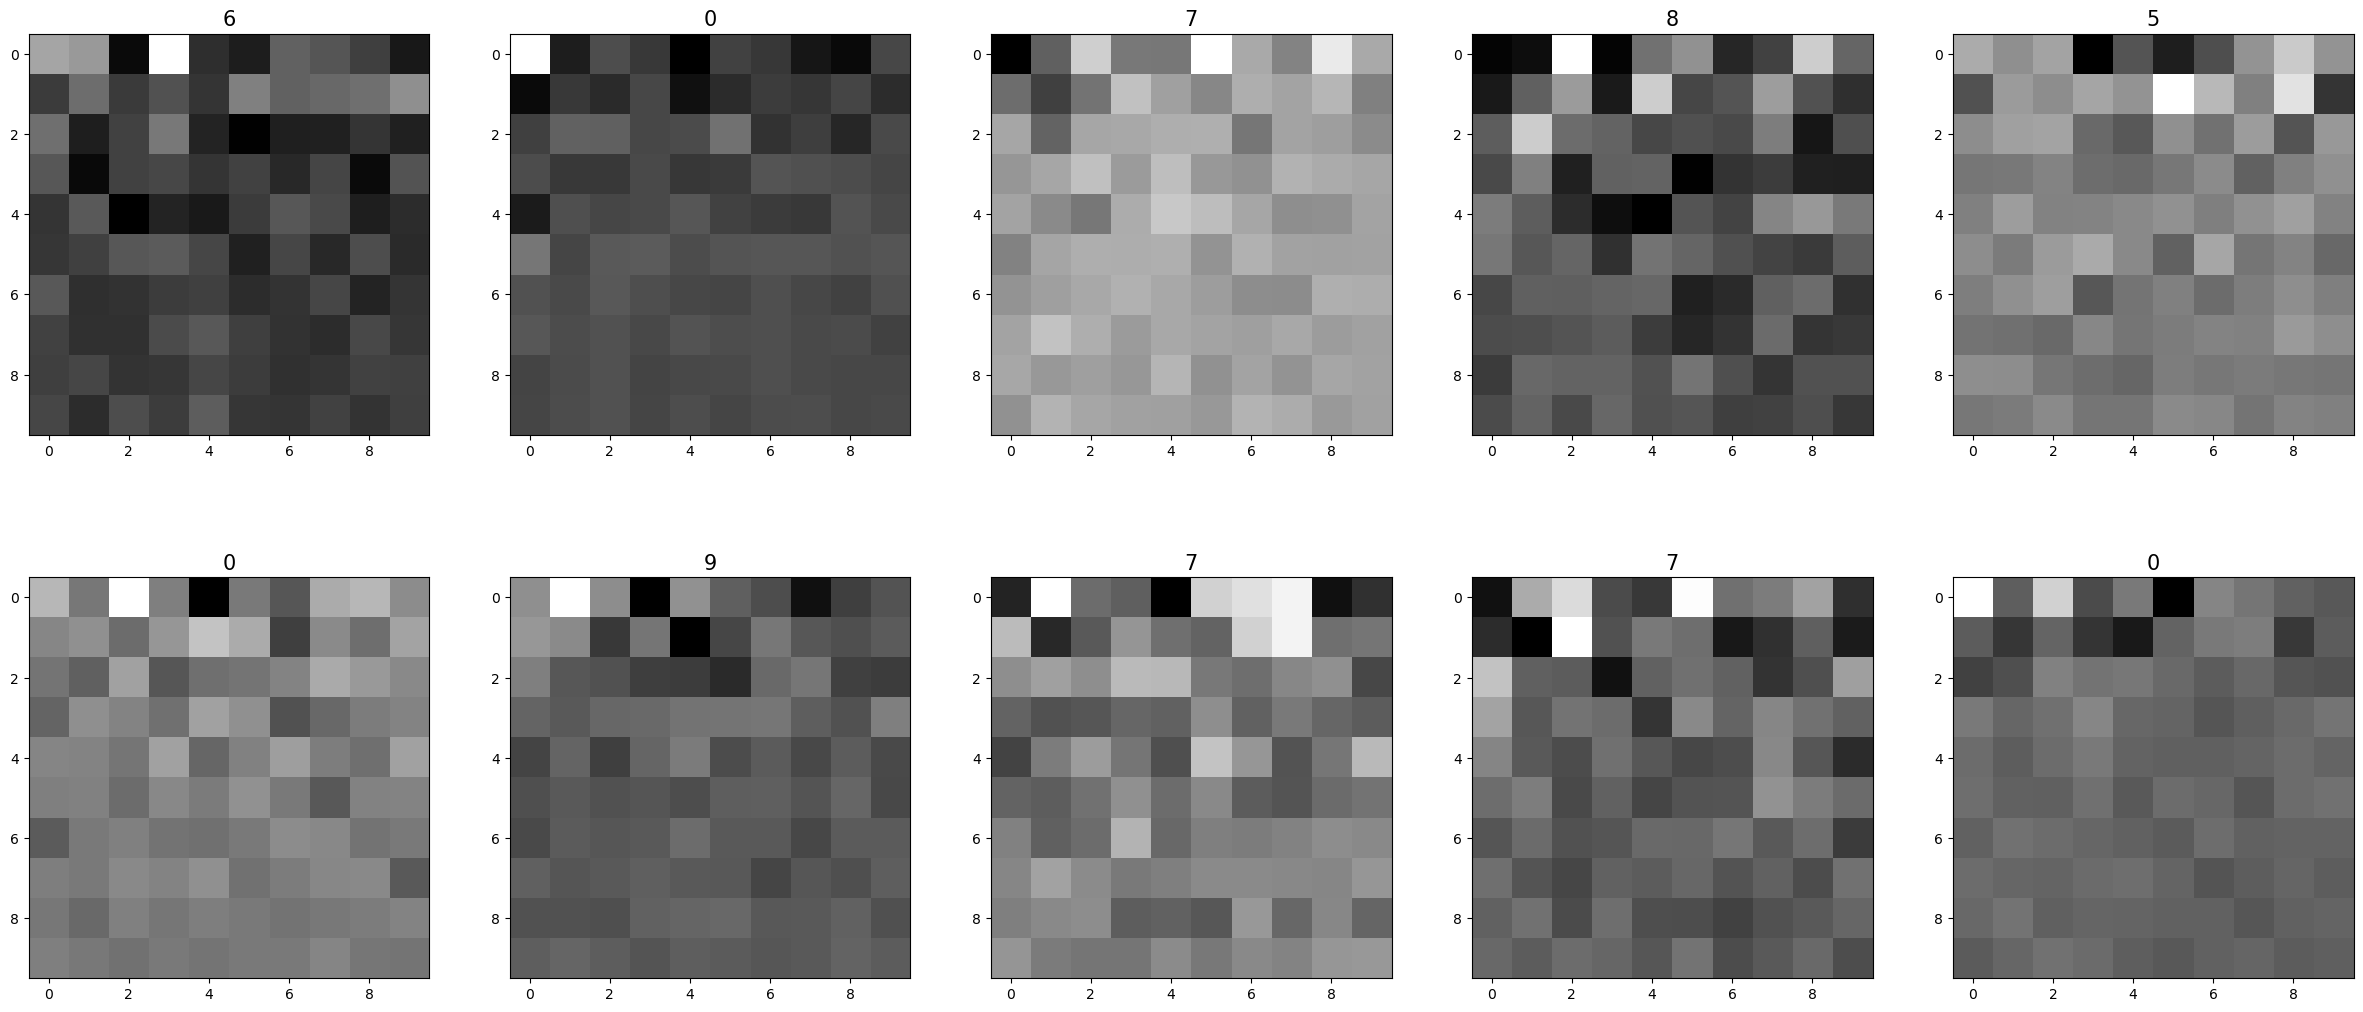

In [289]:
imgIds = stat.random.sample(range(len(y_train)), 10)
show_images(x_train_pca[imgIds], y_train[imgIds] )

### b. Downsampling
Replacing each non-overlapping 3x3 pixel block with its average value.

3x3 Pixel Block Averaging:

In [290]:
def downsample_by_averaging(img: np.ndarray, window_shape = (3,3)) -> np.ndarray:
    """
    First reshape your M x N image into a (M//3) x 3 x (N//3) x 3 array, 
    then use np.mean in the second and last dimensions.
    """
    return np.mean(
        img.reshape((
            *img.shape[:-2],
            img.shape[-2] // window_shape[-2], window_shape[-2],
            img.shape[-1] // window_shape[-1], window_shape[-1],
        )),
        axis=(-1, -3),
    )


In [291]:
# padding 28x28 image with zeros, so that resulting image shape 30x30 is divisible by 3x3
npad = ((0, 0), (1, 1), (1, 1))
x_train_padded = np.pad(x_train, pad_width=npad, mode='constant', constant_values=0)    
x_train_avg_block = downsample_by_averaging(x_train_padded)

x_test_padded = np.pad(x_test, pad_width=npad, mode='constant', constant_values=0)    
x_test_avg_block = downsample_by_averaging(x_test_padded)

# Normalize pixel values to a range of 0 to 1
#x_train_avg_block, x_test_avg_block = x_train_avg_block / 255.0, x_test_avg_block / 255.0

In [292]:
x_train_avg_block.shape

(60000, 10, 10)

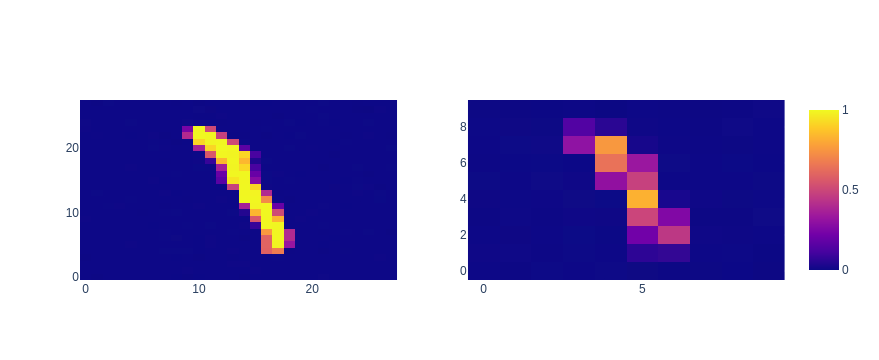

In [293]:
imgId = 4993
compare_images([x_train[imgId], x_train_avg_block[imgId]])

## 11. Apply steps 5-7 to each of these new datasets.

### a. PCA 

In [847]:
# Train the model
model_pca, log = apply_nn(x_train_pca, y_train, x_test_pca,y_test, epochs=epochs)

training model, please wait...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.9762 - loss: 0.0834


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step


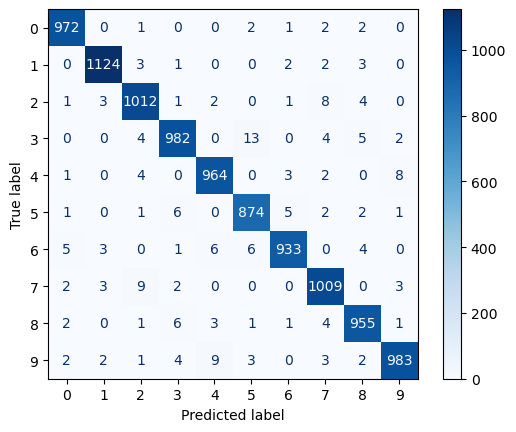

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [849]:
rep = confuse(model_pca,x_test_pca, y_test)
print(rep)

In [850]:
drop_label("DimRed_pca")

epoch      data  accuracy      loss  val_accuracy  val_loss  tst_loss  \
4      4  original  0.975648  0.078405      0.978500  0.070832  0.075883   
5      5  original  0.978204  0.067411      0.980333  0.070757  0.075883   
6      6  original  0.980278  0.061628      0.978667  0.070876  0.075883   
7      7  original  0.981648  0.056346      0.978500  0.069345  0.075883   
8      8  original  0.984259  0.046725      0.981333  0.071313  0.075883   
9      9  original  0.984815  0.044082      0.979667  0.071838  0.075883   
10    10  original  0.986130  0.040977      0.981833  0.067376  0.075883   
11    11  original  0.986778  0.039265      0.983333  0.063144  0.075883   
12    12  original  0.988074  0.035332      0.983833  0.069133  0.075883   
13    13  original  0.988648  0.032934      0.982500  0.071825  0.075883   
14    14  original  0.989593  0.031934      0.983000  0.071941  0.075883   
15    15  original  0.989352  0.030693      0.982833  0.072799  0.075883   
16    16  original  0.990426  0.028132      0.983333  0.071179  0.075883   
17    17  original  0.990333  0.027146      0.981333  0.078911  0.075883   
18    18  original  0.990944  0.026591      0.982833  0.071674  0.075883   
19    19  original  0.990870  0.026881      0.982333  0.073281  0.075883   
4      4      blur  0.892796  0.372480      0.926333  0.266029  0.176504   
5      5      blur  0.898926  0.348033      0.929333  0.252048  0.176504   
6      6      blur  0.903352  0.330445      0.933167  0.238060  0.176504   
7      7      blur  0.908111  0.316027      0.934667  0.227146  0.176504   
8      8      blur  0.910981  0.302177      0.937667  0.217205  0.176504   
9      9      blur  0.914556  0.290623      0.941167  0.207208  0.176504   
10    10      blur  0.918667  0.280328      0.942000  0.202061  0.176504   
11    11      blur  0.921407  0.269210      0.944667  0.193222  0.176504   
12    12      blur  0.923833  0.260878      0.945333  0.187613  0.176504   
13    13      blur  0.924667  0.256492      0.946167  0.179842  0.176504   
14    14      blur  0.928204  0.245910      0.949000  0.174805  0.176504   
15    15      blur  0.929444  0.238473      0.951667  0.168105  0.176504   
16    16      blur  0.932019  0.230695      0.952667  0.163328  0.176504   
17    17      blur  0.933537  0.224938      0.954833  0.157957  0.176504   
18    18      blur  0.935759  0.217565      0.955500  0.156094  0.176504   
19    19      blur  0.939000  0.210064      0.957167  0.148919  0.176504   

    tst_accuracy  
4         0.9814  
5         0.9814  
6         0.9814  
7         0.9814  
8         0.9814  
9         0.9814  
10        0.9814  
11        0.9814  
12        0.9814  
13        0.9814  
14        0.9814  
15        0.9814  
16        0.9814  
17        0.9814  
18        0.9814  
19        0.9814  
4         0.9468  
5         0.9468  
6         0.9468  
7         0.9468  
8         0.9468  
9         0.9468  
10        0.9468  
11        0.9468  
12        0.9468  
13        0.9468  
14        0.9468  
15        0.9468  
16        0.9468  
17        0.9468  
18        0.9468  
19        0.9468

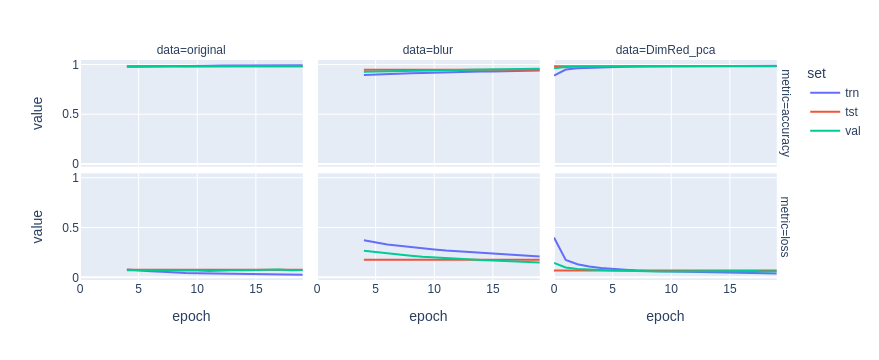

In [851]:
fig, melted = report(log, 'DimRed_pca')
fig

### b. Downsampling
Replacing each non-overlapping 3x3 pixel block with its average value.

In [852]:
# Train the model
model_avg_block, log = apply_nn(x_train_avg_block, y_train, x_test_avg_block,y_test, epochs=epochs)

training model with 20 epochs, please wait...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.9694 - loss: 0.0956


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step


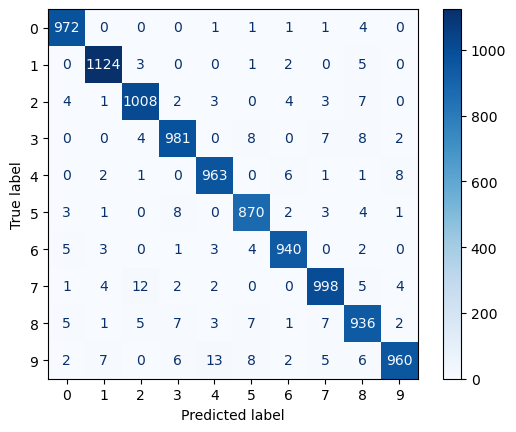

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [854]:
rep = confuse(model_avg_block,x_test_avg_block, y_test)
print(rep)

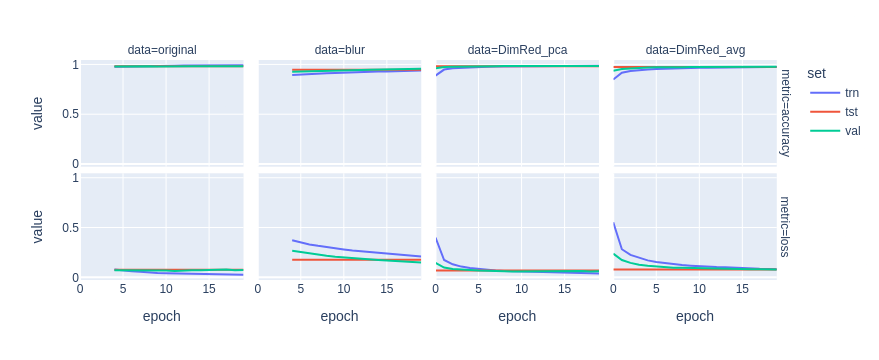

In [855]:
fig, melted = report(log, 'DimRed_avg')
fig

## 12. Compare the results of the classification  
Applied to each of the reduced datasets and the original dataset.

Comparison Summary:


In [60]:
print(f"Original Dataset Accuracy: {test_acc}")
print(f"Modified Dataset Accuracy: {test_acc_avg}")
print(f"PCA-reduced Dataset Accuracy: {test_acc_pca}")
print(f"3x3 Pixel Block Averaged Dataset Accuracy: {test_acc_avg_block}")

Original Dataset Accuracy: 0.9811000227928162


NameError: name 'test_acc_avg' is not defined

Original Dataset: Provides the baseline performance of the model.
Modified Dataset: If accuracy decreases, it suggests that averaging surrounding pixels may obscure critical features necessary for accurate classification.
PCA-reduced Dataset: A significant drop in accuracy may indicate that reducing dimensions via PCA might lose essential details, although it also helps to identify whether the dataset had redundant information.
3x3 Pixel Block Averaged Dataset: Similar to the modified dataset, block averaging simplifies the data and can show how well the model can generalize with reduced complexity.

## 13. Generate two new imbalanced datasets derived from the original dataset:

### a. Decimate
Perform undersampling for two classes within the existing 10 classes.

In [435]:
def decimate(X, y, val_to_dec = [3,4], decimation = 0.9):
    imgIds = np.where(np.isin(y, val_to_dec))[0]
    imgIds = np.random.choice(imgIds, size= int(len(imgIds)*decimation), replace=False)
    X_decim = np.delete(X,imgIds, axis = 0)
    y_decim = np.delete(y,imgIds)
    return X_decim, y_decim

In [440]:
X_train_decim, y_train_decim = decimate(x_train,y_train)
X_train_decim.shape, y_train_decim.shape

((49225, 28, 28), (49225,))

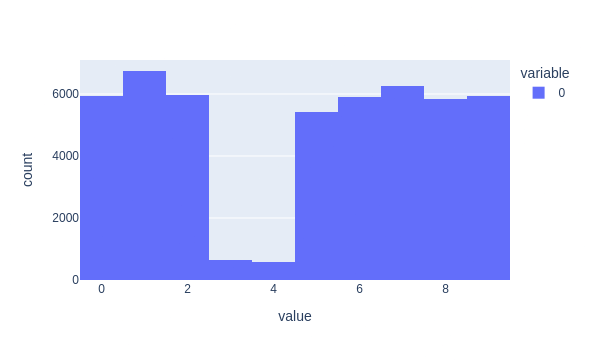

In [441]:
px.histogram(y_train_decim)

In [442]:
X_test_decim, y_test_decim = decimate(x_test,y_test)

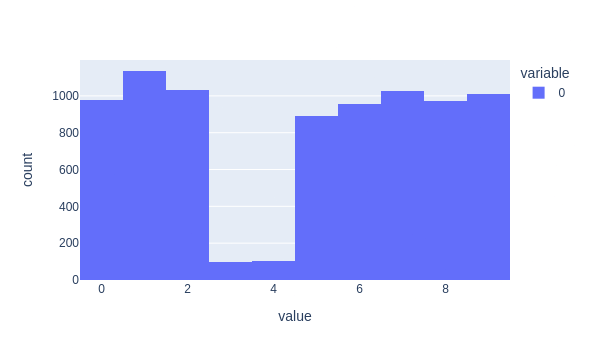

In [444]:
px.histogram(y_test_decim)

### b. Inflate 
Choose two classes among the existing 10 and increase the number of images belonging to these classes by performing image manipulations like rotation, flipping, blurring, etc.

In [575]:
#! conda install -y scikit-image

In [576]:

#from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.util import random_noise

In [643]:
# Shamelessly stolen from here: 
# https://github.com/govinda007/Images/blob/master/augmentation.ipynb

#Lets define functions for each operation
def rotation(image):
    angle= np.random.randint(-180,180)
    return rotate(image, angle)

def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

def add_noise(image):
    return random_noise(image)

def blur_image(image):
    return  average_3x3_blocks(image)
    #cv2.GaussianBlur(img, (9,9),0)

#I would not recommend warp_shifting, because it distorts image, but can be used in many use case like 
#classifying blur and non-blur images
def warp_shift(image): 
    amnt = 5
    x = np.random.randint(-amnt,amnt)
    y = np.random.randint(-amnt,amnt)
    transform = AffineTransform(translation=(x,y))  #chose x,y values according to your convinience
    warp_image = warp(image, transform, mode="wrap")
    return warp_image

transformations = { 'rotate': rotation,                   
                    'horizontal flip': h_flip, 
                    'vertical flip': v_flip,
                    'warp shift': warp_shift,
                    'adding noise': add_noise,
                    'blurring image':blur_image
                 }                #use dictionary to store names of functions 


In [644]:
nTrans = len(transformations)
nTrans

6

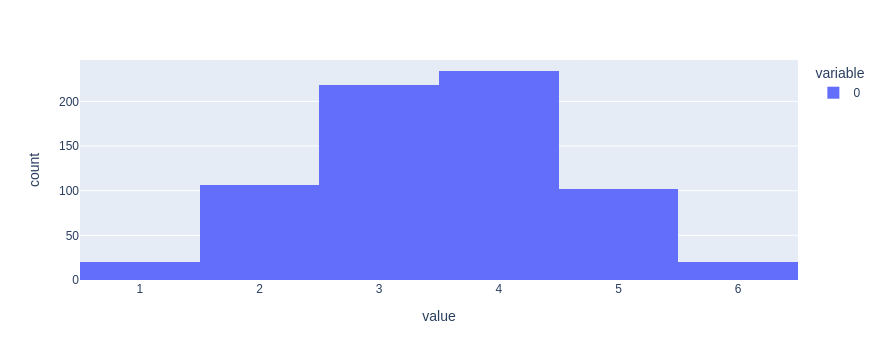

In [645]:
wat  = np.random.binomial(n = nTrans-1, p = 1/2, size = 700) +1
px.histogram( wat)

In [675]:
def transform(X):
    nTrans = len(transformations)  
    
    #choose random number of transformation to apply on the image 
    tc = np.random.binomial(n = nTrans-1, p = 1/2) + 1
    #randomly choosing method to call
    chosen = np.random.choice(list(transformations),size=tc, replace=False,) 
    
    #print(chosen)
    for tr in chosen:
        X = transformations[tr](X)
    return X

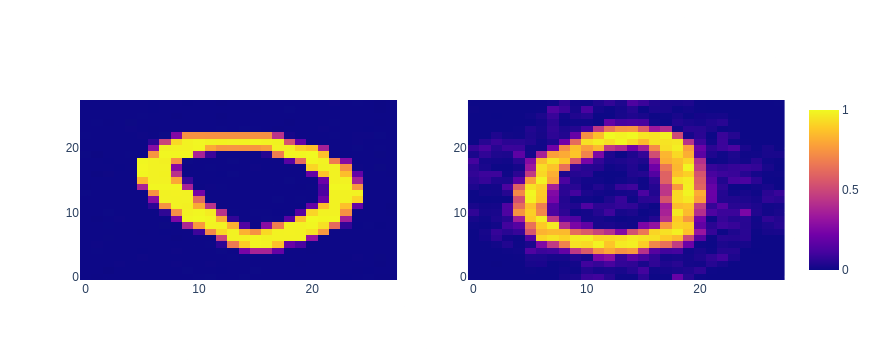

In [676]:
src = x_train[435]
dst = transform(src)
compare_images([src,dst])

In [677]:
def inflate(X, y, val_to_infl = [1,6], inflation = 4):
    imgIds = np.where(np.isin(y, val_to_infl))[0]
    imgIds = np.random.choice(imgIds, size= int(len(imgIds)*inflation), replace=True)
    print(imgIds)
    X_new = [transform(x) for x in (X[imgIds])]
      
    X_infl = np.append(X, X_new, axis=0)
    y_infl = np.append(y,y[imgIds])
    return  X_infl, y_infl

    

In [688]:
X_train_infl, y_train_infl = inflate(x_train,y_train) #(x_train[0:100],y_train[0:100]) #

[42859  1761 31998 ... 19011  3545 36129]


343


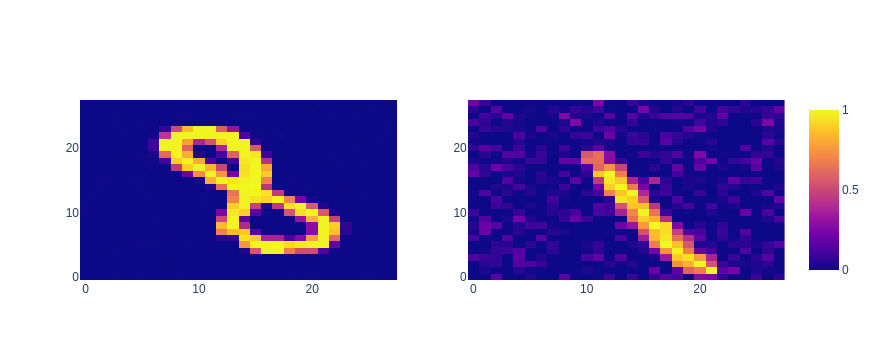

In [689]:
i =  343
#i += 1
print(i)
src = x_train[i]
dst = X_infl[x_train.shape[0] +i]
compare_images([src,dst])

In [690]:
X_train_infl.shape

(110640, 28, 28)

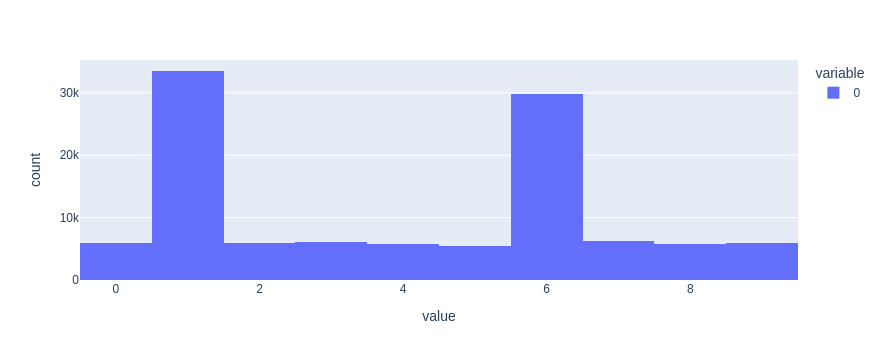

In [691]:
px.histogram(y_train_infl)

In [692]:
X_test_infl, y_test_infl = inflate(x_test,y_test)
X_test_infl.shape, y_test_infl.shape

[7443 6605 3031 ... 5566 1097 8990]


((18372, 28, 28), (18372,))

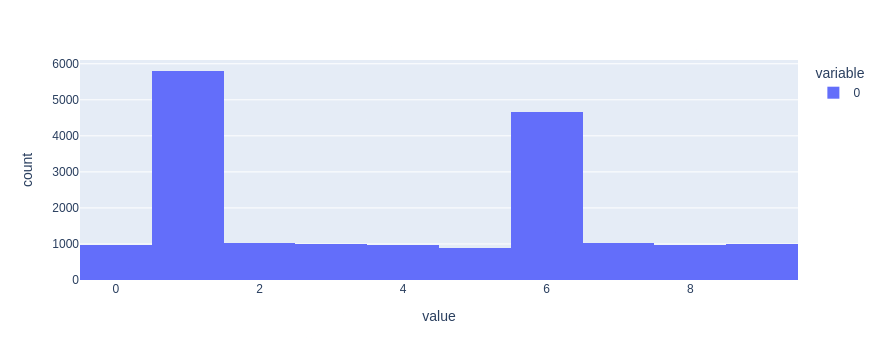

In [693]:
px.histogram(y_test_infl)

## 14. Repeat steps 11-12 for these new datasets

### a. Decimated data

In [856]:
model_decim, log = apply_nn(X_train_decim, y_train_decim, X_test_decim, y_test_decim, epochs=epochs)

training model with 20 epochs, please wait...
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.9752 - loss: 0.1100


257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


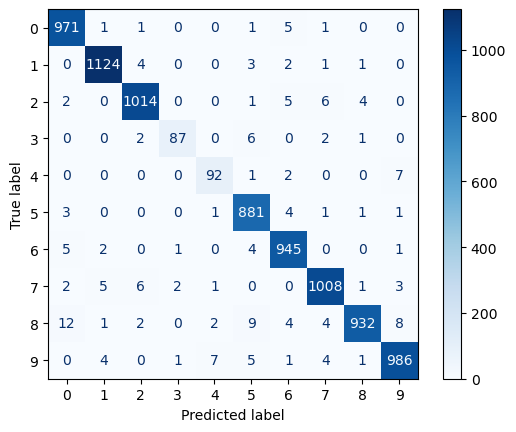

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.96      0.89      0.92        98
           4       0.89      0.90      0.90       102
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98      8208
   macro avg       0.97      0.96      0.97      8208
weighted avg       0.98      0.98      0.98      8208



In [858]:
rep = confuse(model_decim, X_test_decim, y_test_decim)
print(rep)

In [859]:
f,m = report(log, "decimated")

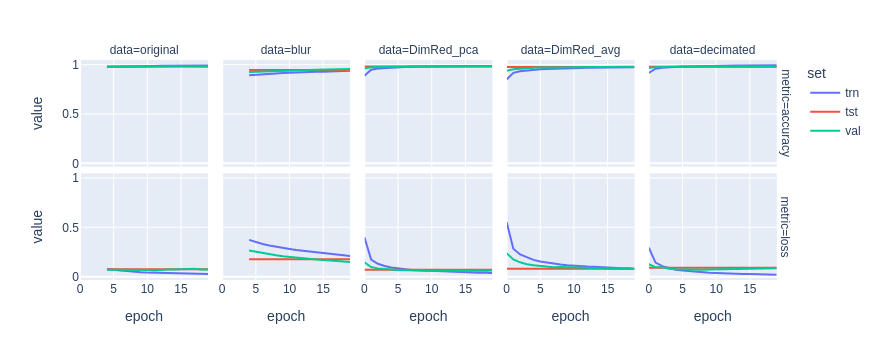

In [860]:
f

### b. Inflated data

In [861]:
model_infl, log = apply_nn(X_train_infl, y_train_infl, X_test_infl, y_test_infl, epochs=epochs)

training model with 20 epochs, please wait...
575/575 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.9747 - loss: 0.0981


575/575 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step


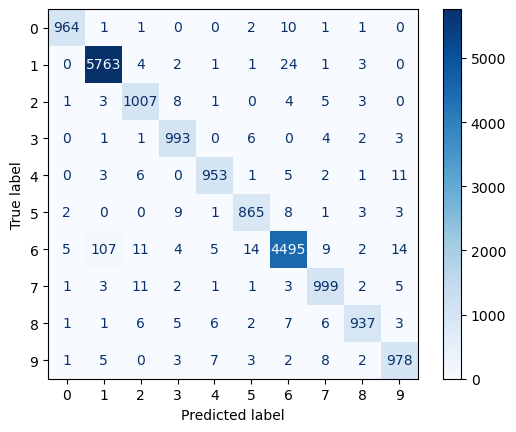

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      5799
           2       0.96      0.98      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.99      0.96      0.97      4666
           7       0.96      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     18372
   macro avg       0.97      0.97      0.97     18372
weighted avg       0.98      0.98      0.98     18372



In [862]:
rep = confuse(model_infl, X_test_infl, y_test_infl)
print(rep)

In [877]:
f,m = report(log, "inflated")

/tmp/ipykernel_24084/3814084191.py:13: UserWarning:

data label 'inflated' already exists. not adding.



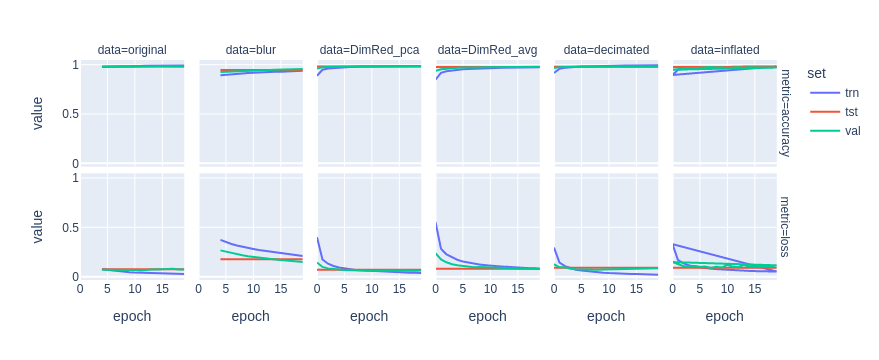

In [878]:
f

In [879]:
m

epoch      data     value  set    metric
0       4  original  0.975648  trn  accuracy
1       5  original  0.978204  trn  accuracy
2       6  original  0.980278  trn  accuracy
3       7  original  0.981648  trn  accuracy
4       8  original  0.984259  trn  accuracy
..    ...       ...       ...  ...       ...
787    15  inflated  0.099364  val      loss
788    16  inflated  0.100749  val      loss
789    17  inflated  0.101308  val      loss
790    18  inflated  0.104977  val      loss
791    19  inflated  0.114586  val      loss

[792 rows x 5 columns]

In [869]:
fit_runs

epoch      data  accuracy      loss  val_accuracy  val_loss  tst_loss  \
4      4  original  0.975648  0.078405      0.978500  0.070832  0.075883   
5      5  original  0.978204  0.067411      0.980333  0.070757  0.075883   
6      6  original  0.980278  0.061628      0.978667  0.070876  0.075883   
7      7  original  0.981648  0.056346      0.978500  0.069345  0.075883   
8      8  original  0.984259  0.046725      0.981333  0.071313  0.075883   
..   ...       ...       ...       ...           ...       ...       ...   
15    15  inflated  0.980658  0.056032      0.972252  0.099364  0.089731   
16    16  inflated  0.981823  0.054127      0.973337  0.100749  0.089731   
17    17  inflated  0.981964  0.054560      0.974060  0.101308  0.089731   
18    18  inflated  0.982717  0.050981      0.973247  0.104977  0.089731   
19    19  inflated  0.982807  0.051431      0.970716  0.114586  0.089731   

    tst_accuracy  
4       0.981400  
5       0.981400  
6       0.981400  
7       0.981400  
8       0.981400  
..           ...  
15      0.977248  
16      0.977248  
17      0.977248  
18      0.977248  
19      0.977248  

[112 rows x 8 columns]

## 15. Conclusion 

In [880]:
def dropped(melted, col, val ):
    # careful! 
    # use this  in case you made a mistake 
    # and submitted wrong data into report 
    # usage: drop_label("DimRed_pca")

    i = melted[melted[col] == val].index
    return melted.drop(i)

acc = dropped(m, "metric", "loss")


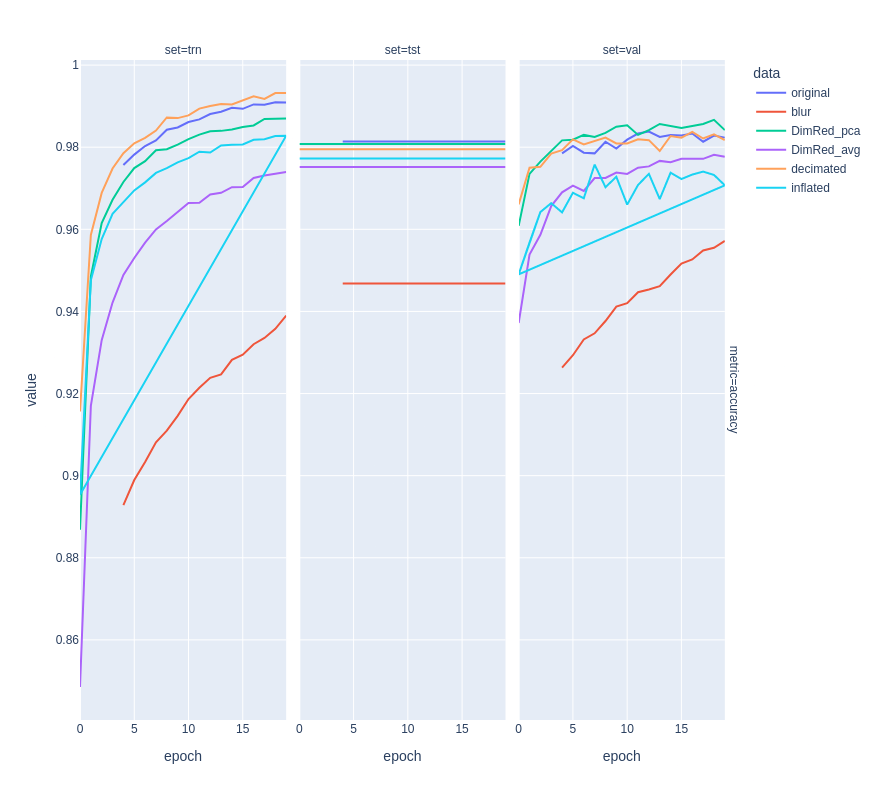

In [881]:
fig = px.line(acc, x='epoch', y='value', color='data', 
              facet_row='metric', facet_col="set", height=800)
fig

In [882]:
loss = dropped(m, "metric", "accuracy")


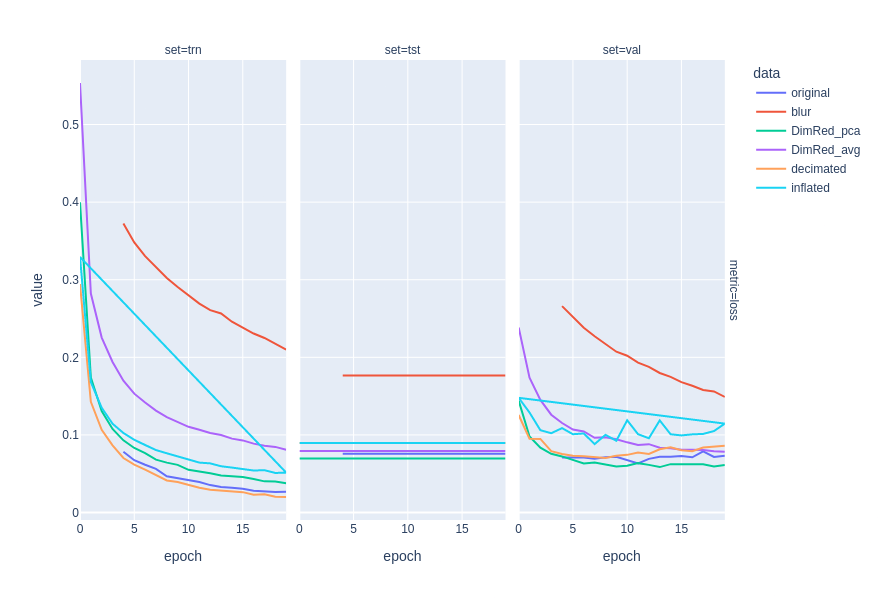

In [884]:
fig = px.line(loss, x='epoch', y='value', color='data', 
              facet_row='metric', facet_col="set", height=600)
fig

## junk code

In [89]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [54]:
%load_ext tensorboard

In [55]:
%tensorboard --logdir logs/fit

In [51]:
!kill 448395

In [342]:
def undersample(x_byclass, y, cls = 4, leave = 0.2 ):
    nImgs = len(x_byclass[cls])
    imgIds = stat.random.sample(range(nImgs), int(nImgs*leave))
    x = x_byclass.copy()
    x[cls] = x_byclass[cls][imgIds,:,:] #[imgIds,:,:]
    return x, y

In [254]:
lal = melted.metric.str.split("val_", expand=True)

In [ ]:
rx = r"(?P<set>[val]+_)?(?P<metr>[A-Za-z]+)"
nspl = melted.metric.str.extract(rx)
melted.drop('metric',axis=1, inplace=True)
melted = melted.join(nspl)

melted.loc[melted.set.isna(),"set"] = "trn"
melted.loc[melted.set == "val_", "set"] = "val"
melted